In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Breast_Cancer.csv')

In [3]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
L=LabelEncoder()


In [6]:
encoder=df.select_dtypes(exclude='number').columns

In [7]:
encoder

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')

In [8]:
for i in encoder:
    print(i)
    df[i]=L.fit_transform(df[i])
    df[i].value_counts()

Race
Marital Status
T Stage 
N Stage
6th Stage
differentiate
Grade
A Stage
Estrogen Status
Progesterone Status
Status


In [9]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


In [10]:
import seaborn as sns

<Axes: >

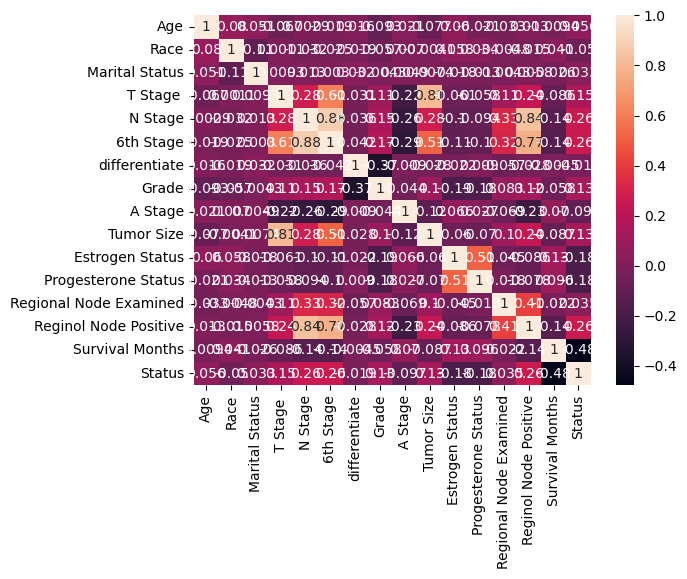

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
x=df.drop('Status',axis=1)


In [13]:
y=df['Status']

<Axes: >

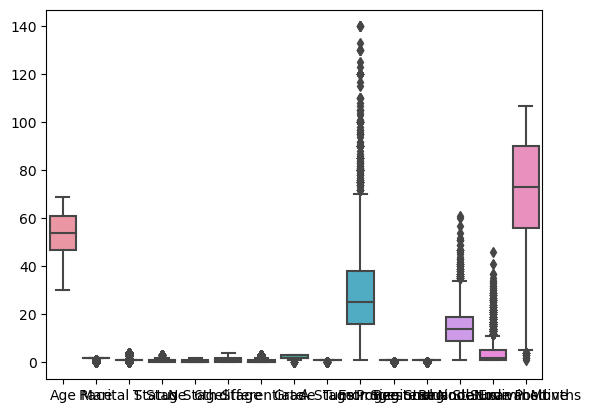

In [14]:
sns.boxplot(x)

In [15]:
x.clip(x.quantile(0.25),x.quantile(0.75),axis=1,inplace=True)

<Axes: >

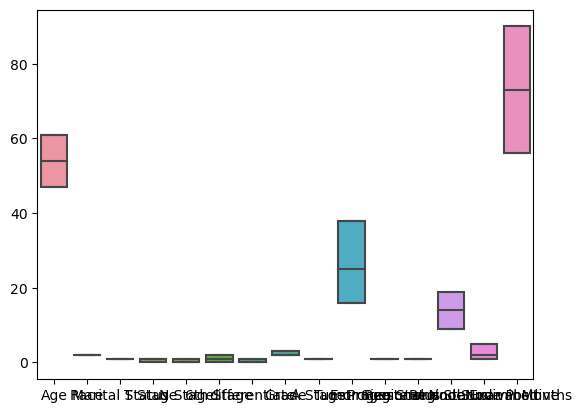

In [16]:
sns.boxplot(x)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
S=StandardScaler()

In [19]:
X=S.fit_transform(x)

In [20]:
X=pd.DataFrame(X,columns=x.columns)

In [21]:
X

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,1.196262,0.0,0.0,-1.228940,-0.687687,-1.266796,1.185437,1.619247,0.0,-1.121272,0.0,0.0,1.262329,-1.007261,-0.934359
1,-0.714787,0.0,0.0,0.813709,1.454150,1.099772,-0.843571,-0.617571,0.0,1.018183,0.0,0.0,0.029413,1.417275,-0.789702
2,0.675067,0.0,0.0,0.813709,1.454150,1.099772,-0.843571,-0.617571,0.0,1.355992,0.0,0.0,0.029413,1.417275,0.150571
3,0.675067,0.0,0.0,-1.228940,-0.687687,-1.266796,1.185437,1.619247,0.0,-0.896066,0.0,0.0,-1.203502,-1.007261,0.801529
4,-1.235982,0.0,0.0,0.813709,-0.687687,-0.083512,1.185437,1.619247,0.0,1.355992,0.0,0.0,-1.203502,-1.007261,-1.223674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1.196262,0.0,0.0,-1.228940,-0.687687,-1.266796,-0.843571,-0.617571,0.0,-1.121272,0.0,0.0,-1.203502,-1.007261,-1.223674
4020,0.327603,0.0,0.0,0.813709,1.454150,1.099772,-0.843571,-0.617571,0.0,1.355992,0.0,0.0,0.029413,1.417275,-0.283401
4021,1.196262,0.0,0.0,0.813709,-0.687687,-0.083512,-0.843571,-0.617571,0.0,-0.445655,0.0,0.0,-0.710336,0.205007,-0.283401
4022,0.675067,0.0,0.0,0.813709,-0.687687,-0.083512,-0.843571,-0.617571,0.0,1.355992,0.0,0.0,-0.710336,-1.007261,-0.066415


In [22]:
X.drop(X.columns[[1,2,8,10,11]],axis=1,inplace=True)

In [23]:
X

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,1.196262,-1.228940,-0.687687,-1.266796,1.185437,1.619247,-1.121272,1.262329,-1.007261,-0.934359
1,-0.714787,0.813709,1.454150,1.099772,-0.843571,-0.617571,1.018183,0.029413,1.417275,-0.789702
2,0.675067,0.813709,1.454150,1.099772,-0.843571,-0.617571,1.355992,0.029413,1.417275,0.150571
3,0.675067,-1.228940,-0.687687,-1.266796,1.185437,1.619247,-0.896066,-1.203502,-1.007261,0.801529
4,-1.235982,0.813709,-0.687687,-0.083512,1.185437,1.619247,1.355992,-1.203502,-1.007261,-1.223674
...,...,...,...,...,...,...,...,...,...,...
4019,1.196262,-1.228940,-0.687687,-1.266796,-0.843571,-0.617571,-1.121272,-1.203502,-1.007261,-1.223674
4020,0.327603,0.813709,1.454150,1.099772,-0.843571,-0.617571,1.355992,0.029413,1.417275,-0.283401
4021,1.196262,0.813709,-0.687687,-0.083512,-0.843571,-0.617571,-0.445655,-0.710336,0.205007,-0.283401
4022,0.675067,0.813709,-0.687687,-0.083512,-0.843571,-0.617571,1.355992,-0.710336,-1.007261,-0.066415


In [24]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
a=SelectKBest(mutual_info_classif,k=5)
a.fit_transform(X,y)

array([[ 1.1962618 , -0.68768715, -1.26679585, -1.0072612 , -0.93435909],
       [-0.71478672,  1.45414961,  1.0997717 ,  1.4172754 , -0.78970176],
       [ 0.67506675,  1.45414961,  1.0997717 ,  1.4172754 ,  0.15057088],
       ...,
       [ 1.1962618 , -0.68768715, -0.08351208,  0.2050071 , -0.28340111],
       [ 0.67506675, -0.68768715, -0.08351208, -1.0072612 , -0.06641511],
       [-1.23598177, -0.68768715, -0.08351208, -0.40112705,  1.23550086]])

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
#error rate
import numpy as np
error=[]
for i in range(1,10):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error.append(np.mean(pred!=y_test))

In [28]:
import matplotlib.pyplot as plt

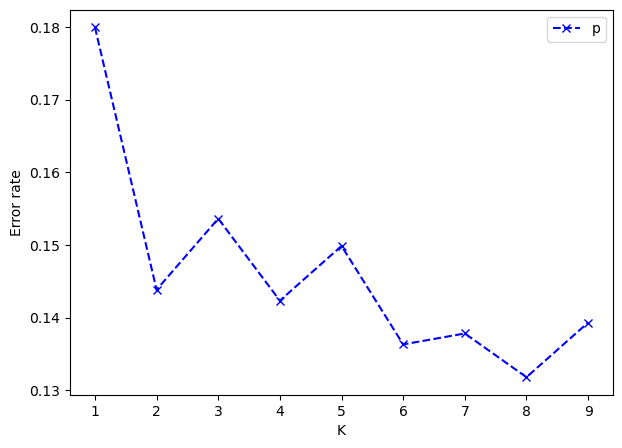

In [29]:
plt.figure(figsize=(7,5))
plt.plot(range(1,10),error,color='b',linestyle='dashed',marker='x')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.legend('points')

In [30]:
KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

accuracy score for KNN with k:2 0.8561746987951807
accuracy score for KNN with k:3 0.8463855421686747
accuracy score for KNN with k:4 0.8576807228915663
accuracy score for KNN with k:5 0.8501506024096386
accuracy score for KNN with k:6 0.8637048192771084
accuracy score for KNN with k:7 0.8621987951807228
accuracy score for KNN with k:8 0.8682228915662651
accuracy score for KNN with k:9 0.8606927710843374


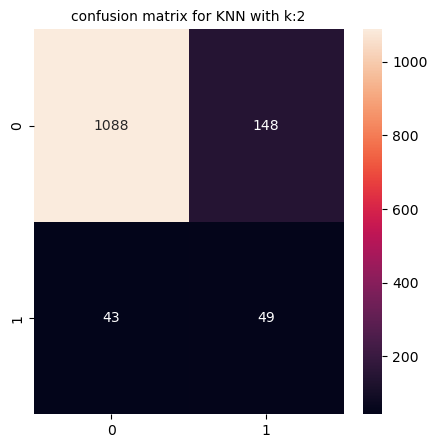

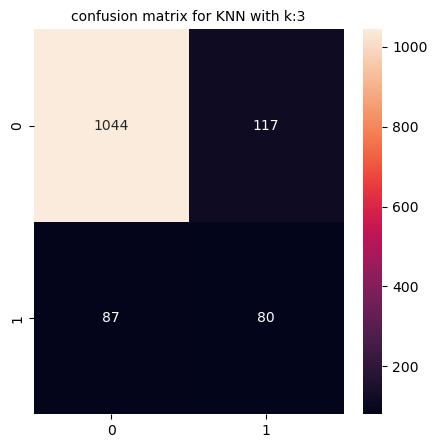

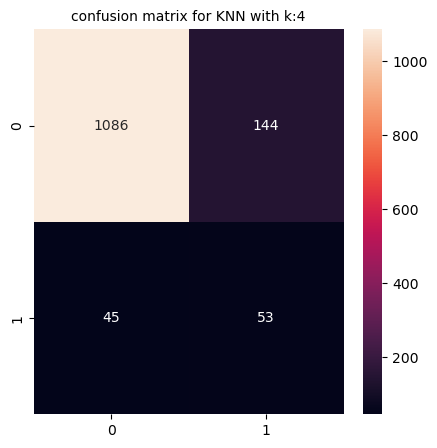

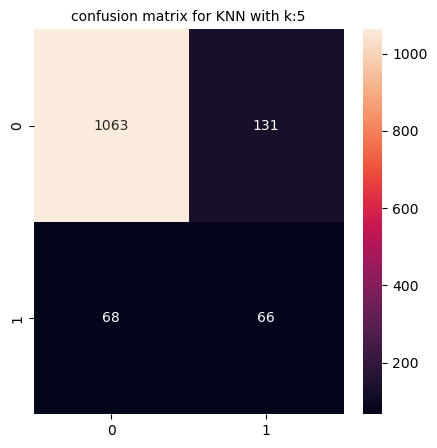

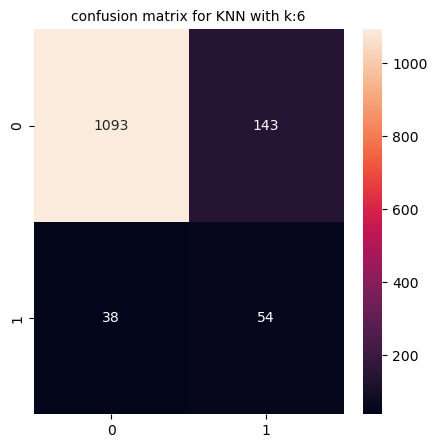

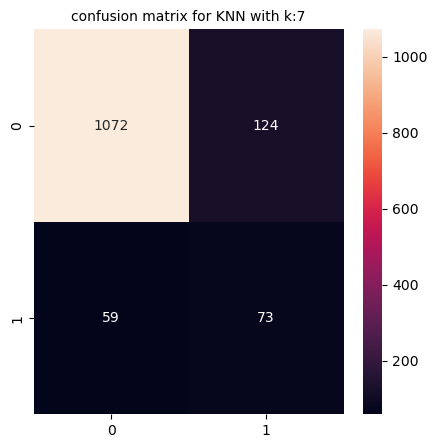

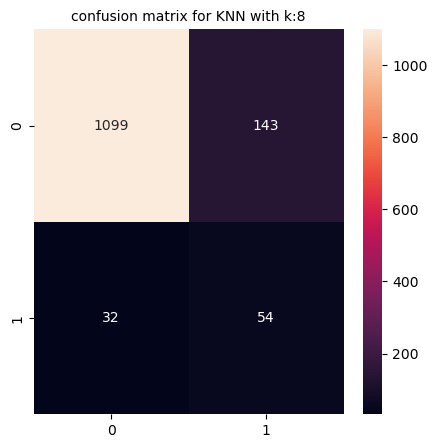

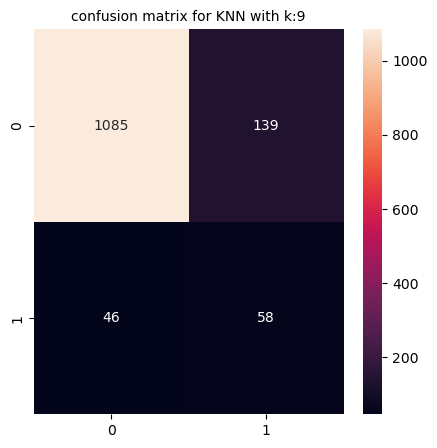

In [32]:
k=[2,3,4,5,6,7,8,9]
for i in k:
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')
    print(f'accuracy score for KNN with k:{i}',accuracy_score(y_pred,y_test))
    plt.title(f'confusion matrix for KNN with k:{i}',size=10)
    

In [33]:
from sklearn.svm import SVC

In [34]:
S=SVC()

In [35]:
S.fit(X_train,y_train)

SVC()

In [36]:
y_p=S.predict(X_test)

<Axes: >

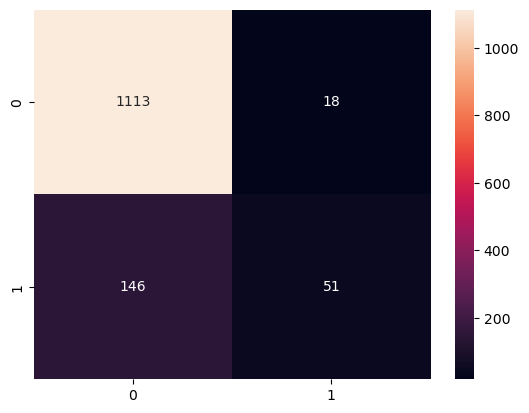

In [37]:
sns.heatmap(confusion_matrix(y_test,y_p),annot=True,fmt='d')

In [38]:
print('Accuracy_SVC:',accuracy_score(y_test,y_p))

Accuracy_SVC: 0.8765060240963856


Accuracy [0.8516566265060241]
Accuracy [0.8516566265060241, 0.875]
Accuracy [0.8516566265060241, 0.875, 0.7944277108433735]
Accuracy [0.8516566265060241, 0.875, 0.7944277108433735, 0.8765060240963856]


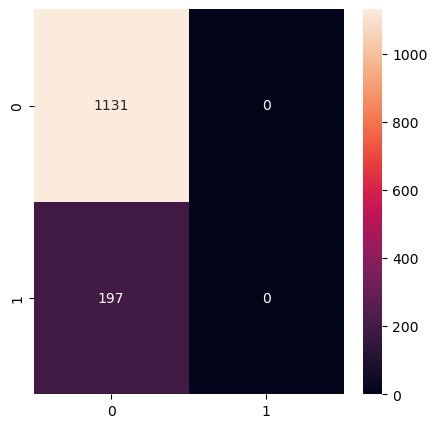

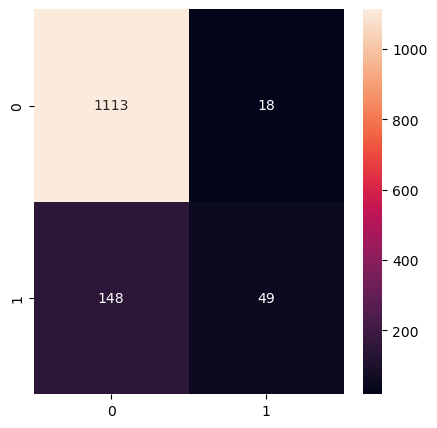

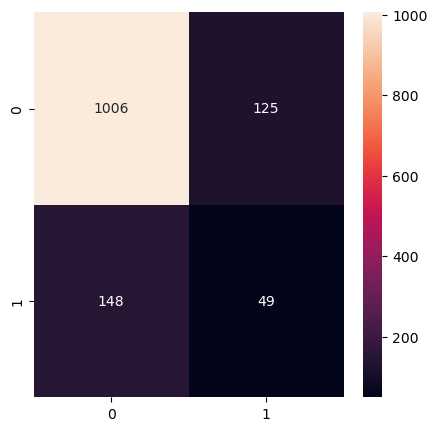

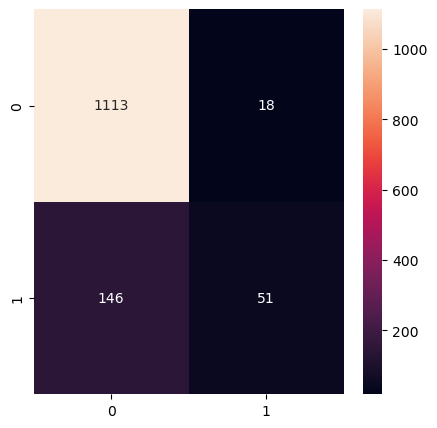

In [39]:
def SVC_kernel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    kernel=['linear','poly','sigmoid','rbf']
    accuracy=[]
    for i in kernel:
        S=SVC(kernel=i)
        S.fit(X_train,y_train)
        y_pro=S.predict(X_test)
        plt.figure(figsize=(5,5))
        
        sns.heatmap(confusion_matrix(y_test,y_pro),annot=True,fmt='d')
        A=accuracy_score(y_test,y_pro)
        accuracy.append(A)
        print('Accuracy',accuracy)
    return accuracy
Acc=SVC_kernel(X,y)
    

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (6).

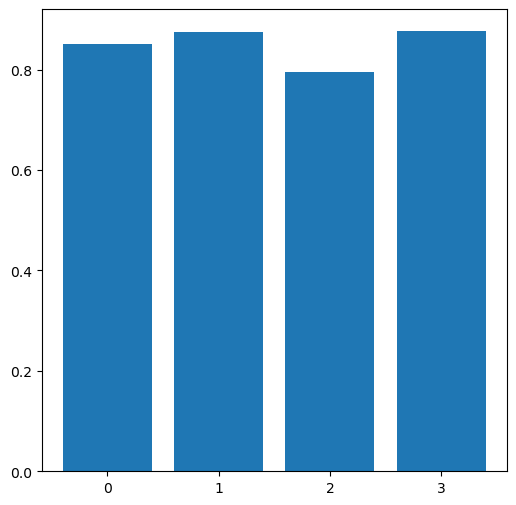

In [40]:
plt.figure(figsize=(6,6))
plt.bar(np.arange(len(Acc)),Acc)
i=['linear','poly','sigmoid','rbf']
for i in i:
    plt.xticks(np.arange(len(Acc)),i)
    plt.xlabel(f'kernel:{i}')
    plt.ylabel('accuracy')
    plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
p={'C': [1, 10,0.1,0.01], 'kernel': ['linear', 'rbf','poly','logloss'],'gamma':['scale','auto'],'degree':[2,3,4,5]}

In [43]:
g=GridSearchCV(S,p,cv=2)

In [44]:
g.fit(X_train,y_train)

C:\Users\22anj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
64 fits failed out of a total of 256.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\22anj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\22anj\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\22anj\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\22anj\anaconda3\Lib\site-packages

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 0.1, 0.01], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'logloss']})

In [45]:
g.best_params_

{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [46]:
y_pG=g.predict(X_test)

<Axes: >

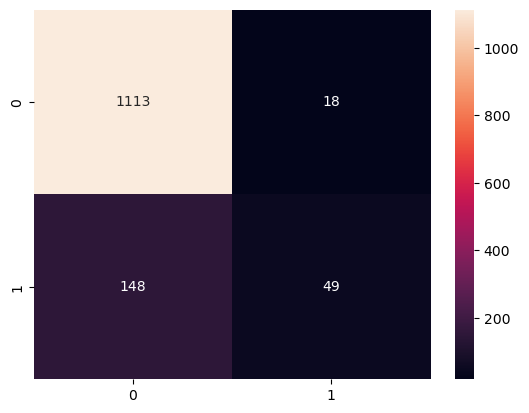

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pG),annot=True,fmt='d')

In [48]:
print('Accuracy_GD_S:',accuracy_score(y_test,y_pG))

Accuracy_GD_S: 0.875


In [49]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [50]:
D=DecisionTreeClassifier()

In [51]:
D.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pre=D.predict(X_test)

<Axes: >

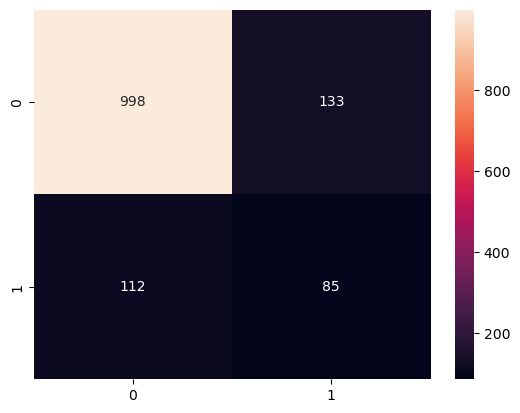

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True,fmt='d')

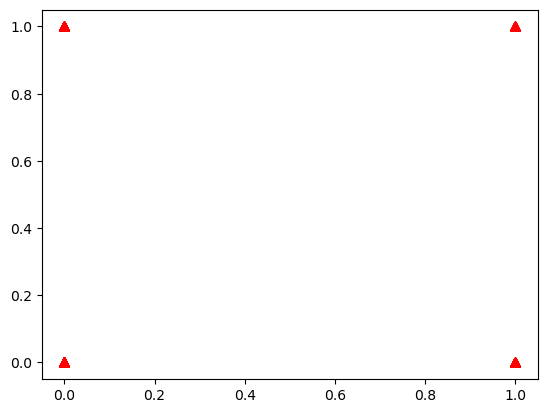

In [54]:
plt.scatter(y_test,y_pre,marker='^',color='red')

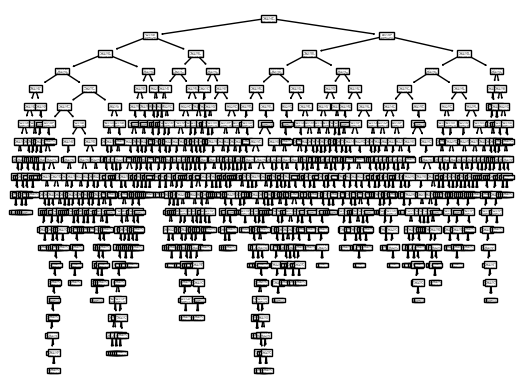

In [56]:
plot_tree(D.fit(X_train,y_train))
plt.show()